# Principal Components Analysis (PCA)
- The next method that we are going to look at is involved in computing transformations of the data in order to identify a lower-dimensional set of axes.
- PCA looks for dimensions of greatest variance.

We have a data matrix $X$ and we want to rotate it so
that the data lies along the directions of maximum variation. This means that we multiply our data matrix by a rotation matrix (often written as $P^T$ ) so that $Y = P^T X$, where $P$ is chosen so that the covariance matrix of $Y$ is diagonal, ie.,


\begin{equation}
cov(Y)= cov(P^{T}X) =
\begin{pmatrix}
\lambda_1 & 0 & 0 & ... & 0\\
   0 & \lambda_2 & 0 & ... & 0\\
   ... & ... & ... & ... & ...\\
   0 & 0 & 0 & ... & \lambda_N
\end{pmatrix} 
\end{equation}. 


\begin{align}
cov(Y) &= E[YY^T] \\
&= E[(P^{T}X)(P^{T}X)^T] \\
&= E[(P^{T}X)(X^{T}P)] \\
&= P^{T}E(XX^T)P \\
&= P^{T}cov(X)P \\
Pcov(Y) &= PP^{T}cov(X)P \\
Pcov(Y) &= cov(X)P \\
\end{align}

As $cov(Y)$ is diagonal, if we write $P$ as a set of column vectors $P = [p_1 , p_2 , . . . , p_N]$ then:


\begin{equation} 
Pcov(Y) = [\lambda_1 p_1, \lambda_2 p_2,...\lambda_N p_N], 
\end{equation} 


which (by writing the $\lambda$ variables in a matrix as $\lambda = (\lambda_1, \lambda_2,...,\lambda_N)^T$ and $Z = cov(X))$ leads to a very interesting equation:

\begin{equation} 
\lambda p_i = Zpi \text{ for each } p_i.
\end{equation} 

Since $\lambda$ is only a column vector, all it does is rescale the $p_i s$; it cannot
rotate it or do anything complicated like that. So this tells us that somehow we have found
a matrix $P$ so that for the directions that $P$ is written in, the matrix $Z$ does not twist
or rotate those directions, but just rescales them. These directions are special enough that
they have a name: they are $eigenvectors$, and the amount that they rescale the axes (the
$\lambda_s$) by are known as eigenvalues.

If we make a matrix $E$ that contains the (normalised)
eigenvectors of a matrix $A$ as columns, then this matrix will take any vector and rotate
it into what is known as the eigenspace. Since $E$ is a rotation matrix, $E^{-1} = E^T$ , so that
rotating the resultant vector back out of the eigenspace requires multiplying it by $E^T$ , where
by ‘normalised’, I mean that the eigenvectors are made unit length. So what should we do
between rotating the vector into the eigenspace, and rotating it back out? The answer is
that we can stretch the vectors along the axes. This is done by multiplying the vector by a diagonal matrix that has the eigenvalues along its diagonal, $D$. So we can decompose any
square symmetric matrix A into the following set of matrices: $A = EDE^T$ , and this is what
we have done to our covariance matrix above. This is called the spectral decomposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8

from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target
Ndata = np.shape(data)[0]
target_ids=[0,1,2]
print data[:5]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## The Principal Components Analysis Algorithm

- Write $N$ datapoints $x_i = (x_{1i} , x_{2i} , . . . , x_{Mi} )$ as row vectors
- Put these vectors into a matrix $X$ (which will have size $N × M$ )
- Centre the data by subtracting off the mean of each column, putting it into matrix $B$

In [2]:
m = np.mean(data, axis=0)
data -=m
print m

[5.84333333 3.054      3.75866667 1.19866667]


- Compute the covariance matrix $C =\frac{1}{N}B^TB$

In [3]:
C = np.cov(data.T)

print np.matmul(data.T, data)/(len(data[:,0])-1)
print C

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


- Compute the eigenvalues and eigenvectors of $C$, so $V^{−1} CV = D$, where $V$ holds the
eigenvectors of $C$ and $D$ is the $M × M$ diagonal eigenvalue matrix
- Sort the columns of $D$ into order of decreasing eigenvalues, and apply the same order
to the columns of $V$
- Reject those with eigenvalue less than some $\eta$, leaving $L$ dimensions in the data


In [4]:
evals,evecs = np.linalg.eig(C)
print evals
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
print indices, evals 
print evecs


[4.22484077 0.24224357 0.07852391 0.02368303]
[0 1 2 3] [4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


evecs.T: 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
data.T: 
[[-0.74333333 -0.94333333 -1.14333333 -1.24333333 -0.84333333]
 [ 0.446      -0.054       0.146       0.046       0.546     ]
 [-2.35866667 -2.35866667 -2.45866667 -2.25866667 -2.35866667]
 [-0.99866667 -0.99866667 -0.99866667 -0.99866667 -0.99866667]]
n.T:
[[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]]


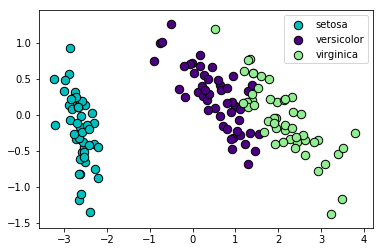

In [6]:
#Produce the new data matrix
n = np.dot(evecs.T, data.T) 
print 'evecs.T: \n',evecs.T
print 'data.T: \n',data.T[:,:5]
print 'n.T:\n',n.T[:5,:]

colors = ['c', 'indigo', 'lightgreen']

for i, c,label in zip(target_ids, colors,iris.target_names):
    plt.scatter(n[0,i == labels],n[1,i == labels], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.show()

TypeError: zip argument #2 must support iteration

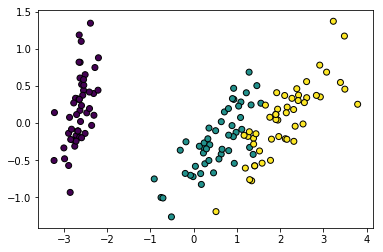

In [16]:
from sklearn.decomposition import PCA

X = iris.data
y = iris.target

pca = PCA(n_components=2).fit(X)

X_pca = pca.transform(X)

n = np.unique(iris.target_names)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y, edgecolors='black',marker='o')
plt.legend(m[0])
plt.show()



## References
[
Machine Learning: An Algorithmic Perspective: Stephen Marsland ](http://dai.fmph.uniba.sk/courses/ICI/References/marsland.machine-learning.2ed.2015.pdf)